#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο
Δημήτριος Κοκκίνης

03118896

***1.Θεωρητικό Μέρος***

Network  | Levels  | Kernel size | Activation Function | Parameters | Pooling | Dropout 
---------|---------|-------------|---------------------|------------|---------|---------
LeNet    | 7     | 5x5   | Sigmoid(tanh) | 2578       | Yes (average) | No
AlexNet  | 11    | 11x11 | ReLU          | 60 million | Yes (max) | Yes
VGG      | 16-19 | 3x3   | ReLU          | 144 million | Yes (max) | Yes

**ΔΙΑΦΟΡΕΣ**

* *Αρχιτεκτονική*

Οι διαφορές ως προς τα επίπεδα αφορούν μόνο τα convolutional και pooling επίπεδα, καθώς και τα 3 δίκτυα έχουν 3 fully-connected επίπεδα. Το δίκτυο LeNet εφαρμόζει φίλτρο μεγέθους 5x5 σε όλα τα επίπεδα, το δίκτυο AlexNet 11x11 στο πρώτο επίπεδο, 5x5 στο δεύτερο και 3x3 στα επόμενα 3 επίπεδα ενώ το VGG χρησιμοποιεί 3x3. Παρακάτω, τα δίκτυα διαφέρουν σημαντικά ως προς τον αριθμό των παραμέτρων με το VGG να παίρνει τη πρωτιά με 144 εκατομμύρια περίπου παραμέτρους, το AlexNet να ακολουθεί με 60 εκατομμύρια και τελευταίο με μεγάλη διαφορά να βρίσκεται το LeNet το οποίο έχει μόνο 2578 παραμέτρους. Μια ακόμη διαφορά ανάμεσα στα δίκτυα είναι πως το δίκτυο LeNet χρησιμοποιεί ως συνάρτηση ενεργοποίησης τη σιγμοειδή ενώ τα άλλα δύο αξιοποιούν την ReLU. Τέλος, μεγάλη διαφορά κάνει επίσης το VGG με τον αριθμό των επιπέδων του τα οποία φτάνουν έως και 19 κάτι που το καθιστά Very Deep Neural Net.

* *Απόδοση*

Ως προς την απόδοση, όπως θα φανεί και στα πειράματα παρακάτω, το LeNet αποδίδει σχετικά χαμηλά σε σχέση με τους διαδόχους του. Στη συνέχεια, το AlexNet αξιοποιεί την εξέλιξη του hardware ώστε να εισάγει περισσότερα επίπεδα με αμέτρητα παραπάνω παραμέτρους, με αποτέλεσμα να πετυχαίνει καλύτερα αποτελέσματα. Όσο για το VGG η ομοιόμορφη αρχιτεκτονική του παίζει σημαντικό ρόλο στην επιτυχία του ωστόσο ένα μειονέκτημά του είναι το υψηλό υπολογιστικό κόστος λόγω των αυξημένων παραμέτρων 

> Παρατηρούμε ότι το δίκτυο LeNet έχει τις μεγαλύτερες διαφορές καθώς έχει μικρότερο βάθος (λίγοτερα επίπεδα), δεν χρησιμοποιεί τεχνική Dropout, η οποία συμβάλλει στην μείωση του overfitting και είναι το μοναδικό που δεν χρησιμοποιεί την συνάρτηση ReLU.

***2.Υλοποίηση Αλγορίθμου***

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from tensorflow.python.keras.engine.sequential import Sequential

from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,AvgPool2D

In [4]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 51

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)
print()
print(len(our_classes))

[' beaver', ' beetle', ' bowl', ' butterfly', ' camel', ' cattle', ' chimpanzee', ' cockroach', ' crocodile', ' fox', ' lamp', ' leopard', ' lizard', ' orange', ' rose', ' seal', ' skyscraper', ' sweet_pepper', ' tiger', ' train']

20


In [ ]:
print(x_train_ds.shape)

print(x_test_ds.shape)

(10000, 32, 32, 3)
(2000, 32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


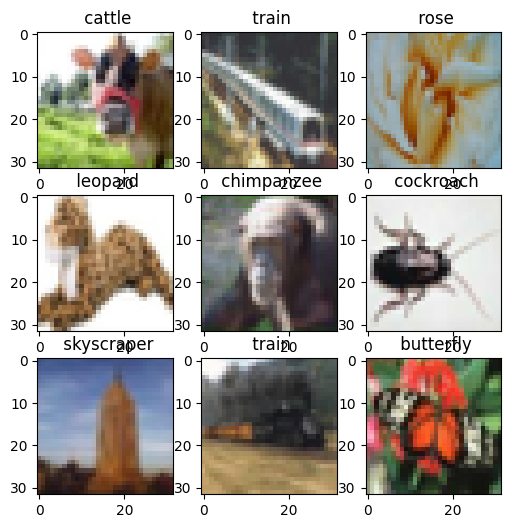

In [8]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255.0
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255.0
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255.0
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


# **Ερώτημα 1**

## Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

---

Επειδή παίρνουμε τα δεδομένα μας απο το dataset CIFAR-100 το οποίο περιέχει 100 κλάσεις [0-99], ενώ το dataset με το οποίο θα δουλέψουμε έχει μόνο 20 κλάσεις [0-19], θα πρέπει να μειώσουμε τους αριθμούς των labels ώστε να είναι αριθμοί στο διάστημα [0-19], με αυτό το τρόπο μπορούμε να χρησιμοποιήσουμε 20 νευρώνες στο τελευταίο layer αντί για 100.

In [ ]:
np.unique(y_train)

array([ 4,  7, 10, 14, 15, 19, 21, 24, 27, 34, 40, 42, 44, 53, 70, 72, 76,
       83, 88, 90])

In [9]:
values = np.unique(y_val)
values = np.sort(values)

y_val_to20 = np.zeros(len(y_val), dtype=int)
for i in range (y_val.shape[0]):
  y_val_to20[i] =  np.where(values == y_val[i])[0][0]

y_train_to20 = np.zeros(len(y_train), dtype=int)
for i in range (y_train.shape[0]):
  y_train_to20[i] =  np.where(values == y_train[i])[0][0]

y_test_to20 = np.zeros(len(y_test), dtype=int)
for i in range (y_test.shape[0]):
  y_test_to20[i] =  np.where(values == y_test[i])[0][0]

Ξεκινάμε σχεδιάζοντας τα δίκτυα που θέλουμε να εκπαιδεύσουμε και στη συνέχεια κάνουμε την μεταγλώττιση και την εκπαίδευση.

  ***1) LeNet***

In [10]:
#LeNet

def LeNet():
  LeNet = Sequential()
  LeNet.add(Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', padding='same',input_shape=(32, 32, 3)))
  LeNet.add(AvgPool2D(pool_size=(2,2), strides=2))
  LeNet.add(Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'))
  LeNet.add(AvgPool2D(pool_size=(2,2), strides=2))

  LeNet.add(Flatten())
  LeNet.add(Dense(120, activation='sigmoid'))
  LeNet.add(Dense(84, activation='sigmoid'))
  LeNet.add(Dense(20))
  return LeNet

In [11]:
#LeNet.build((1,32,32,3))
LeNet_1 = LeNet()
LeNet_2 = LeNet()

LeNet_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### **Περίπτωση Α**
Παρακάτω εκπαιδεύω το δίκτυο LeNet με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> Adam
* Loss Function -> Cross Entropy
* Batch size -> 64 (8500 / 64 = 133 επαναλήψεις)
* Epoch -> 50

In [12]:
LeNet_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_1 = LeNet_1.fit(x_train, y_train_to20, epochs=50, batch_size=64, validation_data=(x_val, y_val_to20))              

Epoch 1/50
133/133 [==============================] - 3s 7ms/step - loss: 3.0116 - accuracy: 0.0505 - val_loss: 3.0074 - val_accuracy: 0.0553
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 2.9525 - accuracy: 0.0689 - val_loss: 2.8109 - val_accuracy: 0.1360
Epoch 3/50
133/133 [==============================] - 0s 4ms/step - loss: 2.7123 - accuracy: 0.1575 - val_loss: 2.6120 - val_accuracy: 0.1967
Epoch 4/50
133/133 [==============================] - 0s 4ms/step - loss: 2.5736 - accuracy: 0.1931 - val_loss: 2.5264 - val_accuracy: 0.2207
Epoch 5/50
133/133 [==============================] - 1s 5ms/step - loss: 2.5116 - accuracy: 0.2107 - val_loss: 2.4810 - val_accuracy: 0.2293
Epoch 6/50
133/133 [==============================] - 1s 6ms/step - loss: 2.4689 - accuracy: 0.2219 - val_loss: 2.4614 - val_accuracy: 0.2420
Epoch 7/50
133/133 [==============================] - 1s 5ms/step - loss: 2.4345 - accuracy: 0.2294 - val_loss: 2.4189 - val_accuracy: 0.2513
Epoch 

### **Περίπτωση Β**

Παρακάτω εκπαιδεύω το δίκτυο LeNet με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> RMSprop
* Loss Function -> Cross Entropy
* Batch size -> 128 (8500 / 128 = 67 επαναλήψεις)
* Epoch -> 50

In [13]:
LeNet_2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

LeNet_history_2 = LeNet_2.fit(x_train, y_train_to20, epochs=50, batch_size=128, validation_data=(x_val, y_val_to20))  

Epoch 1/50
67/67 [==============================] - 1s 10ms/step - loss: 3.0106 - accuracy: 0.0519 - val_loss: 2.9998 - val_accuracy: 0.0527
Epoch 2/50
67/67 [==============================] - 0s 5ms/step - loss: 2.9715 - accuracy: 0.0716 - val_loss: 2.8838 - val_accuracy: 0.1160
Epoch 3/50
67/67 [==============================] - 0s 5ms/step - loss: 2.8074 - accuracy: 0.1307 - val_loss: 2.7467 - val_accuracy: 0.1540
Epoch 4/50
67/67 [==============================] - 0s 5ms/step - loss: 2.6981 - accuracy: 0.1656 - val_loss: 2.6407 - val_accuracy: 0.1973
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 2.6119 - accuracy: 0.1951 - val_loss: 2.6082 - val_accuracy: 0.1853
Epoch 6/50
67/67 [==============================] - 0s 4ms/step - loss: 2.5528 - accuracy: 0.2080 - val_loss: 2.5220 - val_accuracy: 0.2260
Epoch 7/50
67/67 [==============================] - 0s 4ms/step - loss: 2.5132 - accuracy: 0.2187 - val_loss: 2.4885 - val_accuracy: 0.2293
Epoch 8/50
67/67 [=

  ***2.AlexNet***

In [14]:
#AlexNet

def AlexNet():
  AlexNet = tf.keras.models.Sequential()

  #Firstly we introduce a resizing layer because AlexNet is built for data of size 224x224 and our data are of size 32x32
  AlexNet.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
  AlexNet.add(tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'))
  AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

  AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
  AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

  AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  AlexNet.add(tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
  AlexNet.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
                                   
  AlexNet.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))
  AlexNet.add(tf.keras.layers.Flatten())
  AlexNet.add(tf.keras.layers.Dense(4096, activation='relu'))
  AlexNet.add(tf.keras.layers.Dropout(0.5))
  AlexNet.add(tf.keras.layers.Dense(4096, activation='relu'))
  AlexNet.add(tf.keras.layers.Dropout(0.5))
  AlexNet.add(tf.keras.layers.Dense(20, activation='softmax'))

  return AlexNet

In [15]:
AlexNet_1 = AlexNet()
AlexNet_2 = AlexNet()

AlexNet_1.build((32,32,3))
AlexNet_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       8

### **Περίπτωση Α**
Παρακάτω εκπαιδεύω το δίκτυο AlexNet με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> RMSprop
* Loss Function -> Cross Entropy
* Batch size -> 128 (8500 / 128 = 67 επαναλήψεις)
* Epoch -> 20

In [16]:
AlexNet_1.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_1 = AlexNet_1.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 [==============================] - 15s 132ms/step - loss: 3.0083 - accuracy: 0.0504 - val_loss: 2.9986 - val_accuracy: 0.0567
Epoch 2/20
67/67 [==============================] - 6s 94ms/step - loss: 3.0422 - accuracy: 0.0678 - val_loss: 3.0041 - val_accuracy: 0.0527
Epoch 3/20
67/67 [==============================] - 6s 94ms/step - loss: 2.8522 - accuracy: 0.0927 - val_loss: 2.8111 - val_accuracy: 0.0740
Epoch 4/20
67/67 [==============================] - 6s 95ms/step - loss: 2.7977 - accuracy: 0.1035 - val_loss: 2.8723 - val_accuracy: 0.1040
Epoch 5/20
67/67 [==============================] - 6s 92ms/step - loss: 2.8032 - accuracy: 0.1096 - val_loss: 2.6433 - val_accuracy: 0.1547
Epoch 6/20
67/67 [==============================] - 6s 92ms/step - loss: 2.7051 - accuracy: 0.1446 - val_loss: 2.6121 - val_accuracy: 0.1727
Epoch 7/20
67/67 [==============================] - 6s 97ms/step - loss: 2.6370 - accuracy: 0.1776 - val_loss: 2.4813 - val_accuracy: 0.2127
Epoch 8/20
67/67 [====

### **Περίπτωση B**
Παρακάτω εκπαιδεύω το δίκτυο AlexNet με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> SGD
* Loss Function -> Cross Entropy
* Batch size -> 64 (8500 / 256 = 34 επαναλήψεις)
* Epoch -> 30

In [17]:
AlexNet_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

AlexNet_history_2 = AlexNet_2.fit(x_train, y_train_to20, epochs=30, batch_size=64,
                    validation_data=(x_val, y_val_to20))

Epoch 1/30
133/133 [==============================] - 11s 59ms/step - loss: 2.9900 - accuracy: 0.0538 - val_loss: 2.9757 - val_accuracy: 0.0640
Epoch 2/30
133/133 [==============================] - 7s 54ms/step - loss: 2.9195 - accuracy: 0.0938 - val_loss: 2.7423 - val_accuracy: 0.1727
Epoch 3/30
133/133 [==============================] - 8s 57ms/step - loss: 2.7660 - accuracy: 0.1222 - val_loss: 2.6619 - val_accuracy: 0.1780
Epoch 4/30
133/133 [==============================] - 8s 57ms/step - loss: 2.6960 - accuracy: 0.1496 - val_loss: 2.5527 - val_accuracy: 0.2120
Epoch 5/30
133/133 [==============================] - 7s 56ms/step - loss: 2.6328 - accuracy: 0.1699 - val_loss: 2.5137 - val_accuracy: 0.2180
Epoch 6/30
133/133 [==============================] - 8s 57ms/step - loss: 2.5677 - accuracy: 0.1926 - val_loss: 2.4952 - val_accuracy: 0.2287
Epoch 7/30
133/133 [==============================] - 7s 56ms/step - loss: 2.5053 - accuracy: 0.2099 - val_loss: 2.4898 - val_accuracy: 0.227

  ***3)VGG***

In [18]:
#VGG
# Some customizations were made so that images with 32x32x3 dimensions are used as input. For this
# reason a smaller number of vggs blocks(less layers) were used so that its output dimensions are not decreased.
def VGG_block(num_convs, num_channels):
  block = models.Sequential()
  for _ in range(num_convs):
    block.add(layers.Conv2D(num_channels, kernel_size=3, padding='same', activation='relu'))
  block.add(layers.MaxPool2D(pool_size=2, strides=2))
  return block


def VGG(conv_arch):
  model = models.Sequential()
  model.add(layers.Conv2D(conv_arch[0][1], kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  # The convulational part
  for (num_convs, num_channels) in conv_arch:
      model.add(VGG_block(num_convs, num_channels))
  # The fully-connected part
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  return model

In [19]:
conv_arch = ((1, 64), (1, 128), (2, 256))

VGG_1 = VGG(conv_arch)
VGG_2 = VGG(conv_arch)

VGG_1.build((32,32,3))
VGG_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 sequential_3 (Sequential)   (None, 16, 16, 64)        36928     
                                                                 
 sequential_4 (Sequential)   (None, 8, 8, 128)         73856     
                                                                 
 sequential_5 (Sequential)   (None, 4, 4, 256)         885248    
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_4 (Dropout)         (None, 4096)             

### **Περίπτωση Α**
Παρακάτω εκπαιδεύω το δίκτυο VGG με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> Adam
* Loss Function -> Cross Entropy
* Batch size -> 128 (8500 / 128 = 67 επαναλήψεις)
* Epoch -> 30

In [20]:
VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

VGG_history_1 = VGG_1.fit(x_train, y_train_to20, epochs=30, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/30
67/67 [==============================] - 7s 47ms/step - loss: 2.9124 - accuracy: 0.0887 - val_loss: 2.6491 - val_accuracy: 0.1647
Epoch 2/30
67/67 [==============================] - 2s 31ms/step - loss: 2.4948 - accuracy: 0.2024 - val_loss: 2.3824 - val_accuracy: 0.2427
Epoch 3/30
67/67 [==============================] - 2s 31ms/step - loss: 2.2763 - accuracy: 0.2776 - val_loss: 2.1398 - val_accuracy: 0.3280
Epoch 4/30
67/67 [==============================] - 2s 31ms/step - loss: 2.0659 - accuracy: 0.3481 - val_loss: 2.0078 - val_accuracy: 0.3733
Epoch 5/30
67/67 [==============================] - 2s 30ms/step - loss: 1.9048 - accuracy: 0.3921 - val_loss: 1.9032 - val_accuracy: 0.3973
Epoch 6/30
67/67 [==============================] - 2s 31ms/step - loss: 1.7522 - accuracy: 0.4324 - val_loss: 1.7639 - val_accuracy: 0.4500
Epoch 7/30
67/67 [==============================] - 2s 30ms/step - loss: 1.5866 - accuracy: 0.4820 - val_loss: 1.6862 - val_accuracy: 0.4793
Epoch 8/30
67

### **Περίπτωση B**
Παρακάτω εκπαιδεύω το δίκτυο VGG με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> RMSprop
* Loss Function -> Cross Entropy
* Batch size -> 64 (8500 / 64 = 133 επαναλήψεις)
* Epoch -> 30

In [21]:
VGG_2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

VGG_history_2 = VGG_2.fit(x_train, y_train_to20, epochs=30, batch_size=64,
                    validation_data=(x_val, y_val_to20))

Epoch 1/30
133/133 [==============================] - 5s 20ms/step - loss: 2.9894 - accuracy: 0.0688 - val_loss: 2.9307 - val_accuracy: 0.0407
Epoch 2/30
133/133 [==============================] - 2s 19ms/step - loss: 2.6761 - accuracy: 0.1546 - val_loss: 2.4879 - val_accuracy: 0.2220
Epoch 3/30
133/133 [==============================] - 4s 29ms/step - loss: 2.4466 - accuracy: 0.2346 - val_loss: 2.3043 - val_accuracy: 0.2820
Epoch 4/30
133/133 [==============================] - 4s 27ms/step - loss: 2.2266 - accuracy: 0.3041 - val_loss: 1.9369 - val_accuracy: 0.3893
Epoch 5/30
133/133 [==============================] - 2s 19ms/step - loss: 2.0215 - accuracy: 0.3618 - val_loss: 2.1162 - val_accuracy: 0.3493
Epoch 6/30
133/133 [==============================] - 2s 18ms/step - loss: 1.8239 - accuracy: 0.4228 - val_loss: 1.8115 - val_accuracy: 0.4513
Epoch 7/30
133/133 [==============================] - 2s 19ms/step - loss: 1.6595 - accuracy: 0.4802 - val_loss: 1.6834 - val_accuracy: 0.4753

  ***4)MyCNN***

In [22]:
#MyCNN

def MyCNN():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))  
  model.add(layers.MaxPool2D(pool_size=2, strides=2)) 
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')) 
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(20))
  return model

In [23]:
MyCNN_1 = MyCNN()
MyCNN_2 = MyCNN()

MyCNN_1.build((32,32,3))
MyCNN_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 512)         1180160   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 512)      

### **Περίπτωση Α**
Παρακάτω εκπαιδεύω το δίκτυο MyCNN με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> Adam
* Loss Function -> Cross Entropy
* Batch size -> 128 (8500 / 128 = 67 επαναλήψεις)
* Epoch -> 20

In [25]:
MyCNN_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_1 = MyCNN_1.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 5s 38ms/step - loss: 2.7684 - accuracy: 0.1294 - val_loss: 2.3908 - val_accuracy: 0.2547
Epoch 2/20
67/67 [==============================] - 2s 25ms/step - loss: 2.2527 - accuracy: 0.2948 - val_loss: 2.0402 - val_accuracy: 0.3593
Epoch 3/20
67/67 [==============================] - 2s 25ms/step - loss: 1.9231 - accuracy: 0.3936 - val_loss: 1.8005 - val_accuracy: 0.4373
Epoch 4/20
67/67 [==============================] - 2s 26ms/step - loss: 1.6893 - accuracy: 0.4661 - val_loss: 1.7956 - val_accuracy: 0.4660
Epoch 5/20
67/67 [==============================] - 2s 28ms/step - loss: 1.5044 - accuracy: 0.5255 - val_loss: 1.5917 - val_accuracy: 0.5087
Epoch 6/20
67/67 [==============================] - 2s 26ms/step - loss: 1.3152 - accuracy: 0.5805 - val_loss: 1.4150 - val_accuracy: 0.5447
Epoch 7/20
67/67 [==============================] - 2s 27ms/step - loss: 1.1567 - accuracy: 0.6295 - val_loss: 1.3981 - val_accuracy: 0.5593
Epoch 8/20
67

### **Περίπτωση Β**
Παρακάτω εκπαιδεύω το δίκτυο MyCNN με τον εξής συνδυασμό παραμέτρων:

* Optimizer -> SGD
* Loss Function -> Cross Entropy
* Batch size -> 64 (8500 / 64 = 133 επαναλήψεις)
* Epoch -> 50

In [26]:
MyCNN_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_2 = MyCNN_2.fit(x_train, y_train_to20, epochs=50, batch_size=64,
                    validation_data=(x_val, y_val_to20))

Epoch 1/50
133/133 [==============================] - 4s 17ms/step - loss: 2.9826 - accuracy: 0.0744 - val_loss: 2.9617 - val_accuracy: 0.1227
Epoch 2/50
133/133 [==============================] - 2s 16ms/step - loss: 2.9414 - accuracy: 0.1024 - val_loss: 2.8889 - val_accuracy: 0.1513
Epoch 3/50
133/133 [==============================] - 2s 15ms/step - loss: 2.8212 - accuracy: 0.1464 - val_loss: 2.7098 - val_accuracy: 0.1640
Epoch 4/50
133/133 [==============================] - 2s 15ms/step - loss: 2.6688 - accuracy: 0.1731 - val_loss: 2.5689 - val_accuracy: 0.2213
Epoch 5/50
133/133 [==============================] - 2s 16ms/step - loss: 2.5875 - accuracy: 0.1896 - val_loss: 2.5041 - val_accuracy: 0.2267
Epoch 6/50
133/133 [==============================] - 2s 16ms/step - loss: 2.5200 - accuracy: 0.2099 - val_loss: 2.4683 - val_accuracy: 0.2260
Epoch 7/50
133/133 [==============================] - 2s 16ms/step - loss: 2.4495 - accuracy: 0.2364 - val_loss: 2.3866 - val_accuracy: 0.2533

## Βήμα 2: Αξιολόγηση των μοντέλων

---

In [48]:
#Κώδικας για την απεικόνιση των αποτελεσμάτων

# print graph 
def print_graph(history, model):
    fig = plt.figure()
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc = model.evaluate(x_test,  y_test_to20, verbose=2)
    plt.show()

#print graph for two combinations of the same model
def print_graph_together(history1, history2, name1, name2):
  fig = plt.figure()
  plt.plot(history1.history['accuracy'], label=name1+' accuracy')
  plt.plot(history1.history['val_accuracy'], label = name1+' val_accuracy')
  plt.plot(history2.history['accuracy'], label=name2+' accuracy')
  plt.plot(history2.history['val_accuracy'], label = name2+' val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  plt.show()

#print graph of the best combinations of all models
def print_all(mylist):
  fig = plt.figure()
  for (hist,name) in mylist:
    plt.plot(hist.history['accuracy'], label=name+" accuracy")
    plt.plot(hist.history['val_accuracy'], label= name+" val_accuracy")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  plt.show()


### ***LeNet***

63/63 - 0s - loss: 1.9998 - accuracy: 0.3775


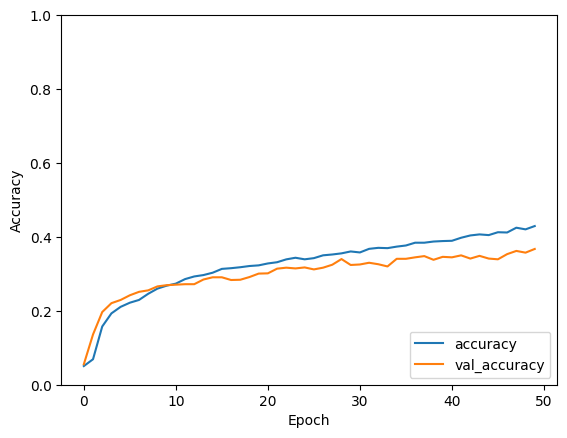

In [29]:
#LeNet 1
print_graph(LeNet_history_1, LeNet_1)

63/63 - 0s - loss: 2.1858 - accuracy: 0.3115


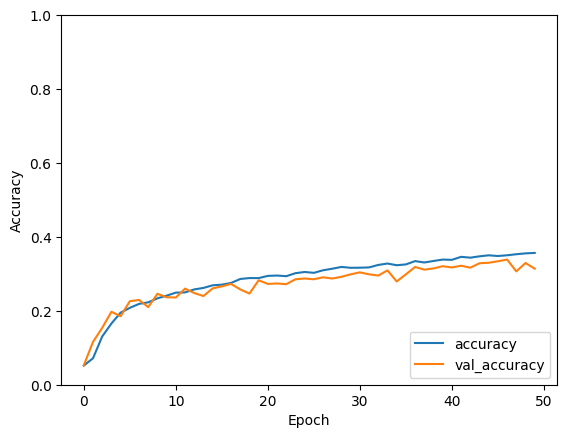

In [30]:
#LeNet 2
print_graph(LeNet_history_2, LeNet_2)

*Συγκεντρωτικά*

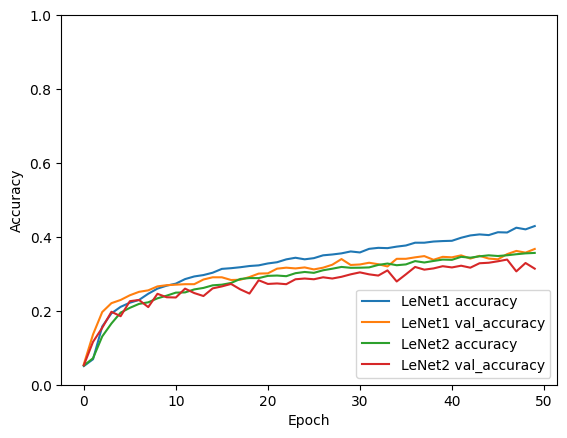

In [31]:
print_graph_together(LeNet_history_1, LeNet_history_2, "LeNet1", "LeNet2")

Όπως βλέπουμε ο πρώτος συνδυασμός παραμέτρων αποδίδει καλύτερα αποτελέσματα

Για αυτό, βάζουμε τη συγκεκριμένη υλοποίηση τη λίστα με τις καλύτερες ώστε να εμφανίσουμε στο τέλος τα καλύτερα αποτελέσματα

In [36]:
best = []

best.append((LeNet_history_1,'LeNet with Adam'))

### ***AlexNet***

63/63 - 1s - loss: 1.9307 - accuracy: 0.4525 - 1s/epoch - 22ms/step


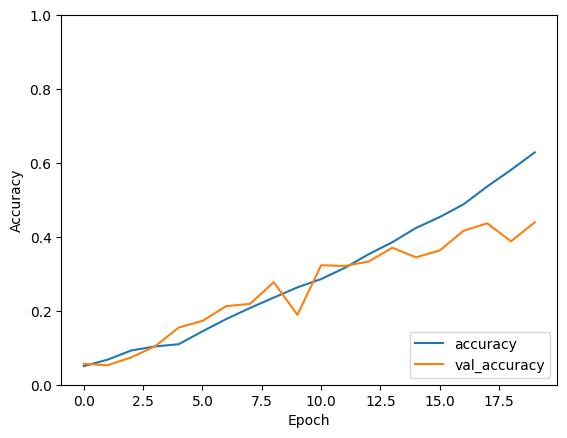

In [32]:
#AlexNet 1
print_graph(AlexNet_history_1, AlexNet_1)

63/63 - 1s - loss: 1.5281 - accuracy: 0.5255 - 714ms/epoch - 11ms/step


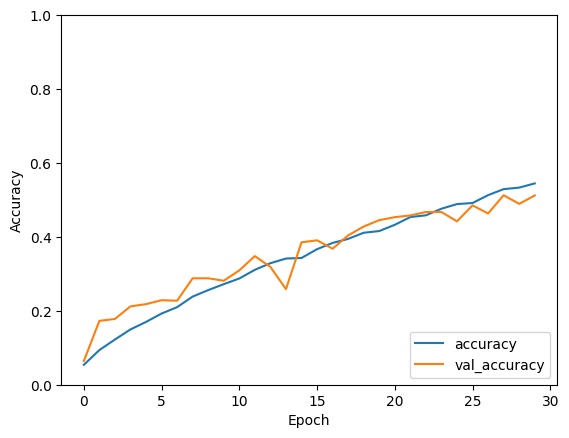

In [33]:
#AlexNet 2
print_graph(AlexNet_history_2, AlexNet_2)

*Συγκεντρωτικά*

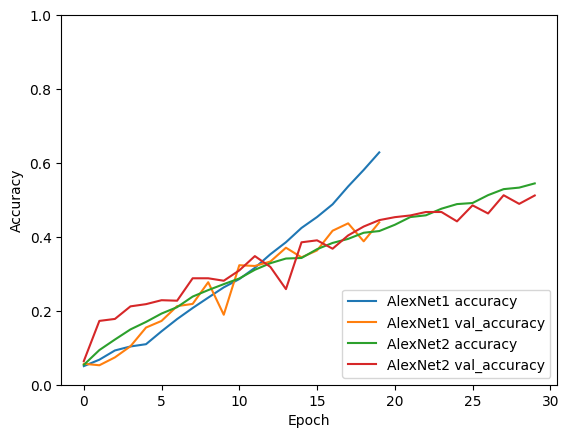

In [34]:
print_graph_together(AlexNet_history_1, AlexNet_history_2, "AlexNet1", "AlexNet2")

Παρατηρούμε και πάλι πως ο πρώτος συνδυασμός επιφέρει καλύτερα αποτελέσματα

In [37]:
best.append((AlexNet_history_1, "AlexNet with RMSprop"))

### ***VGG***


63/63 - 1s - loss: 2.8999 - accuracy: 0.5570 - 710ms/epoch - 11ms/step


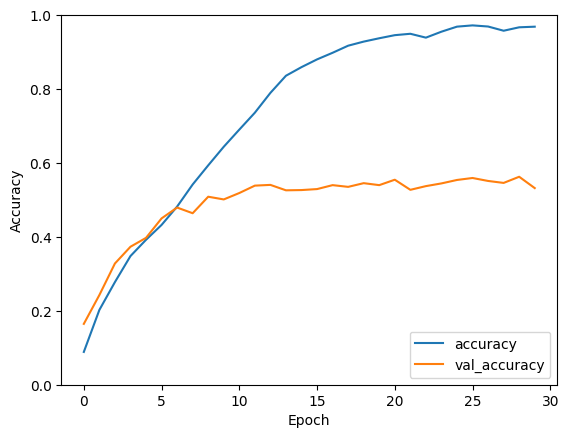

In [38]:
#VGG 1
print_graph(VGG_history_1, VGG_1)

63/63 - 0s - loss: 3.6607 - accuracy: 0.5805 - 293ms/epoch - 5ms/step


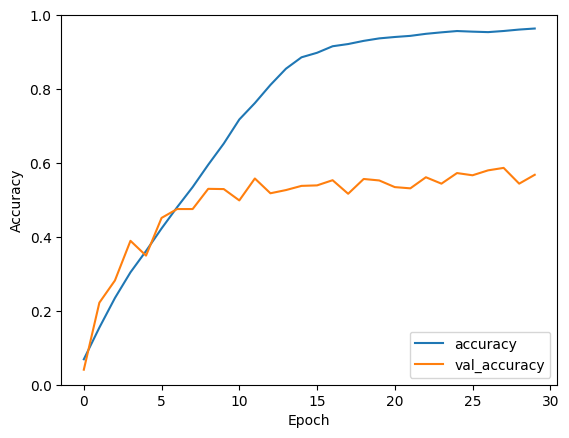

In [39]:
#VGG 2
print_graph(VGG_history_2, VGG_2)

*Συγκεντρωτικά*

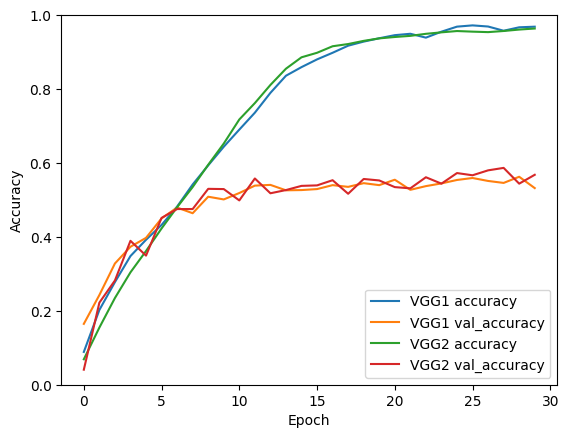

In [40]:
print_graph_together(VGG_history_1, VGG_history_2, "VGG1", "VGG2")

Βλέπουμε πως και τα δύο μοντέλα έχουν παρόμοια συμπεριφορά και διαλέγουμε τον δεύτερο συνδυασμό 

In [41]:
best.append((VGG_history_2, "VGG with RMSprop"))

### ***MyCNN***



63/63 - 1s - loss: 2.2988 - accuracy: 0.6055 - 526ms/epoch - 8ms/step


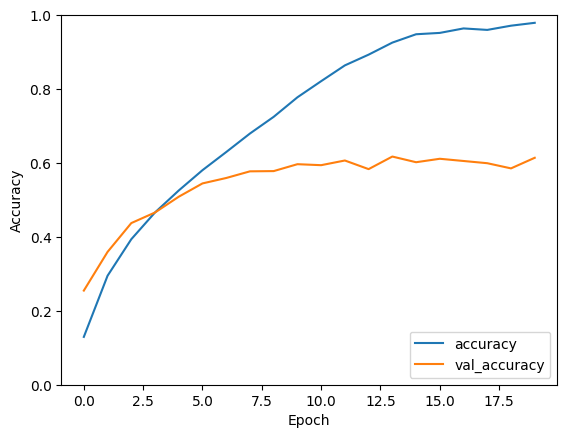

In [42]:
#MyCNN 1
print_graph(MyCNN_history_1, MyCNN_1)

63/63 - 0s - loss: 1.5988 - accuracy: 0.5195 - 368ms/epoch - 6ms/step


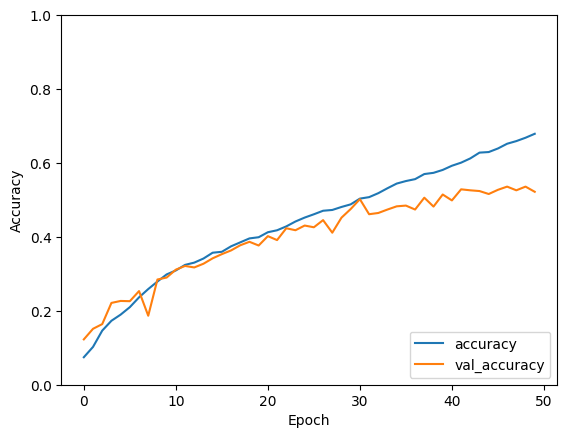

In [43]:
#MyCNN 2
print_graph(MyCNN_history_2, MyCNN_2)

*Συγκεντρωτικά*

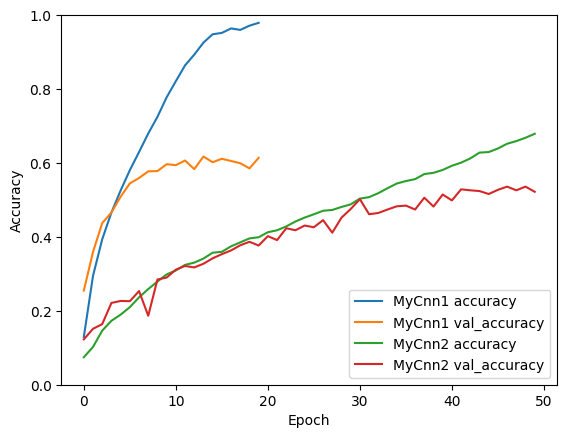

In [45]:
print_graph_together(MyCNN_history_1,MyCNN_history_2, "MyCnn1", "MyCnn2")

Φαίνεται καθαρά πως η πρώτη περίπτωση αποδίδει καλύτερα

In [46]:
best.append((MyCNN_history_1, "MyCnn with adam"))

Συγκεντρώνουμε τα παραπάνω αποτελέσματα σε ένα κοινό διάγραμμα για την ορθότητα εκπαίδευσης και επικύρωσης για τα μοντέλα.

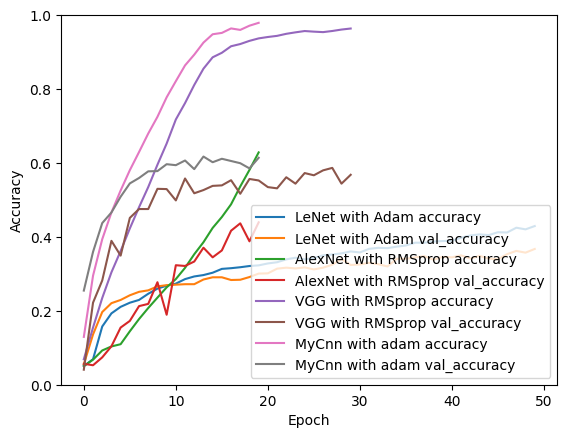

In [47]:
print_all(best)

## Βήμα 3: Αξιολόγηση ορθότητας

---

***Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου:***

Όσο περισσότερα δεδομένα υπάρχουν για την εκπαίδευση ενός δικτύου, τόσο καλύτερα είναι τα αποτελέσματά του καθώς η εκπαίδευση είναι πιο ποιοτική και μπορεί να γενικεύσει καλύτερα.

***Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer):***

Η επιλογή του κατάλληλου αλγόριθμου βελτιστοποίησης είναι πολύ σημαντική για την επίδοση του δικτύου αλλά εξαρτάται απο το εκάστοτε πρόβλημα και το μοντέλο υπο εκπαίδευση. Από δοκιμές που έγιναν, φάνηκε ότι κάποιοι αλγόριθμοι αποδίδουν καλύτερα σε κάποια δίκτυα και καθόλου καλά σε άλλα, όπως φαίνεται εξάλλου και απο τα αποτελέσματα.

***Επίδραση του μεγέθους δέσμης (batch size):***

Η μείωση του μεγέθους δέσμης έχει ως αποτέλεσμα τη βελτίωση επίδοσης αλλά αυξάνει σημαντικά το χρόνο εκπαίδευσης.

***Γενικά συμπεράσματα:***

Η επίδοση του δικτύου LeNet είναι εμφανώς χειρότερη από τα υπόλοιπα. Το MyCNN είχε τις καλύτερες επιδόσεις με λιγότερες εποχές από τα υπόλοιπα αλλά αυτό κατά πάσα πιθανότητα οφείλεται στα δεδομένα εισόδου.

**LeNet**

In [49]:
LeNet_1.evaluate(x_test, y_test_to20)

63/63 [==============================] - 0s 2ms/step - loss: 1.9998 - accuracy: 0.3775


[1.999774694442749, 0.3774999976158142]

**AlexNet**

In [50]:
AlexNet_1.evaluate(x_test, y_test_to20)

63/63 [==============================] - 1s 11ms/step - loss: 1.9307 - accuracy: 0.4525


[1.930662989616394, 0.45249998569488525]

**VGG**

In [51]:
VGG_2.evaluate(x_test, y_test_to20)

63/63 [==============================] - 0s 7ms/step - loss: 3.6607 - accuracy: 0.5805


[3.6607248783111572, 0.5805000066757202]

**MyCNN**

In [52]:
MyCNN_1.evaluate(x_test, y_test_to20)

63/63 [==============================] - 0s 5ms/step - loss: 2.2988 - accuracy: 0.6055


[2.298828125, 0.6054999828338623]

# **Ερώτημα 2**

## Βήμα 1: Έλεγχος υπερεκπαίδευσης

In [54]:
# Dropout
def dropout(dropout_val):
  dropout_layer = models.Sequential()
  dropout_layer.add(layers.Dropout(dropout_val))
  return dropout_layer

In [55]:
# Επαύξηση δεδομένων
from tensorflow import keras

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [56]:
# Ορισμός νέου μοντέλου με data augmentation & dropout
def MyCNN_with_data_augmentation_n_dropout(data_aug_flag, dropout_val):
  model = models.Sequential()
  if(data_aug_flag):
    model.add(data_augmentation)      
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))  
  model.add(layers.MaxPool2D(pool_size=2, strides=2)) 
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')) 
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

### **Δοκιμές**

Εφαρμόζω διάφορους συνδυασμούς Data Augmentation & Dropout για το μοντέλο 1 του MyCNN το οποίο έχει τις παραμέτρους:

Optimizer = Adam

Batch Size = 128

Epochs = 20

#### **Δοκιμή 1: Data Augmentation & Dropout 0.1**

In [57]:
MyCNN_testing_1 = MyCNN_with_data_augmentation_n_dropout(True, 0.1)

MyCNN_testing_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_1 = MyCNN_testing_1.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 7s 31ms/step - loss: 2.6393 - accuracy: 0.1825 - val_loss: 2.3094 - val_accuracy: 0.2693
Epoch 2/20
67/67 [==============================] - 2s 27ms/step - loss: 2.1350 - accuracy: 0.3348 - val_loss: 2.0246 - val_accuracy: 0.3607
Epoch 3/20
67/67 [==============================] - 2s 27ms/step - loss: 1.9248 - accuracy: 0.3912 - val_loss: 1.8496 - val_accuracy: 0.4267
Epoch 4/20
67/67 [==============================] - 2s 27ms/step - loss: 1.7902 - accuracy: 0.4355 - val_loss: 1.9721 - val_accuracy: 0.3893
Epoch 5/20
67/67 [==============================] - 2s 28ms/step - loss: 1.6687 - accuracy: 0.4691 - val_loss: 1.6961 - val_accuracy: 0.4607
Epoch 6/20
67/67 [==============================] - 2s 29ms/step - loss: 1.5833 - accuracy: 0.4913 - val_loss: 1.6067 - val_accuracy: 0.4927
Epoch 7/20
67/67 [==============================] - 2s 27ms/step - loss: 1.4897 - accuracy: 0.5275 - val_loss: 1.5506 - val_accuracy: 0.5133
Epoch 8/20
67

#### **Δοκιμή 2: No Data Augmentation & Dropout 0.2**

In [58]:
MyCNN_testing_2 = MyCNN_with_data_augmentation_n_dropout(False, 0.2)

MyCNN_testing_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_2 = MyCNN_testing_2.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 4s 29ms/step - loss: 2.6132 - accuracy: 0.1808 - val_loss: 2.2441 - val_accuracy: 0.2860
Epoch 2/20
67/67 [==============================] - 2s 26ms/step - loss: 2.0744 - accuracy: 0.3475 - val_loss: 2.0019 - val_accuracy: 0.3627
Epoch 3/20
67/67 [==============================] - 2s 27ms/step - loss: 1.7702 - accuracy: 0.4367 - val_loss: 1.7125 - val_accuracy: 0.4453
Epoch 4/20
67/67 [==============================] - 2s 25ms/step - loss: 1.5304 - accuracy: 0.5151 - val_loss: 1.6296 - val_accuracy: 0.4993
Epoch 5/20
67/67 [==============================] - 2s 26ms/step - loss: 1.3289 - accuracy: 0.5831 - val_loss: 1.4659 - val_accuracy: 0.5420
Epoch 6/20
67/67 [==============================] - 2s 25ms/step - loss: 1.1360 - accuracy: 0.6326 - val_loss: 1.5360 - val_accuracy: 0.5273
Epoch 7/20
67/67 [==============================] - 2s 26ms/step - loss: 0.9789 - accuracy: 0.6804 - val_loss: 1.7054 - val_accuracy: 0.5233
Epoch 8/20
67

#### **Δοκιμή 3: Data Augmentation & Dropout 0.2**

In [59]:
MyCNN_testing_3 = MyCNN_with_data_augmentation_n_dropout(True, 0.2)

MyCNN_testing_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_3 = MyCNN_testing_3.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 4s 32ms/step - loss: 2.6629 - accuracy: 0.1673 - val_loss: 2.3499 - val_accuracy: 0.2507
Epoch 2/20
67/67 [==============================] - 2s 26ms/step - loss: 2.2176 - accuracy: 0.3074 - val_loss: 2.0563 - val_accuracy: 0.3660
Epoch 3/20
67/67 [==============================] - 2s 27ms/step - loss: 1.9591 - accuracy: 0.3844 - val_loss: 1.9847 - val_accuracy: 0.3747
Epoch 4/20
67/67 [==============================] - 2s 29ms/step - loss: 1.8083 - accuracy: 0.4295 - val_loss: 1.7048 - val_accuracy: 0.4520
Epoch 5/20
67/67 [==============================] - 2s 26ms/step - loss: 1.6588 - accuracy: 0.4728 - val_loss: 1.6024 - val_accuracy: 0.4913
Epoch 6/20
67/67 [==============================] - 2s 27ms/step - loss: 1.5729 - accuracy: 0.4998 - val_loss: 1.4810 - val_accuracy: 0.5400
Epoch 7/20
67/67 [==============================] - 2s 27ms/step - loss: 1.4834 - accuracy: 0.5262 - val_loss: 1.4467 - val_accuracy: 0.5560
Epoch 8/20
67

#### **Δοκιμή 4: Data Augmentation & Dropout 0.5**

In [60]:
MyCNN_testing_4 = MyCNN_with_data_augmentation_n_dropout(True, 0.5)

MyCNN_testing_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_4 = MyCNN_testing_4.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 4s 33ms/step - loss: 2.6523 - accuracy: 0.1681 - val_loss: 2.2799 - val_accuracy: 0.2907
Epoch 2/20
67/67 [==============================] - 2s 29ms/step - loss: 2.2089 - accuracy: 0.3045 - val_loss: 2.0332 - val_accuracy: 0.3627
Epoch 3/20
67/67 [==============================] - 2s 26ms/step - loss: 2.0045 - accuracy: 0.3658 - val_loss: 1.8541 - val_accuracy: 0.4207
Epoch 4/20
67/67 [==============================] - 2s 27ms/step - loss: 1.8440 - accuracy: 0.4172 - val_loss: 1.7157 - val_accuracy: 0.4627
Epoch 5/20
67/67 [==============================] - 2s 27ms/step - loss: 1.7326 - accuracy: 0.4453 - val_loss: 1.7602 - val_accuracy: 0.4513
Epoch 6/20
67/67 [==============================] - 2s 26ms/step - loss: 1.6319 - accuracy: 0.4887 - val_loss: 1.6486 - val_accuracy: 0.4773
Epoch 7/20
67/67 [==============================] - 2s 27ms/step - loss: 1.5588 - accuracy: 0.5056 - val_loss: 1.4684 - val_accuracy: 0.5467
Epoch 8/20
67

**Αποτελέσματα**

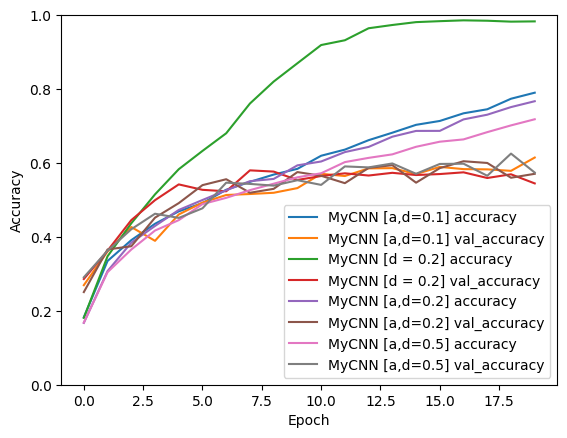

In [62]:
print_all([(MyCNN_history_testing_1, "MyCNN [a,d=0.1]"), (MyCNN_history_testing_2, "MyCNN [d = 0.2]"), (MyCNN_history_testing_3, "MyCNN [a,d=0.2]"), (MyCNN_history_testing_4,"MyCNN [a,d=0.5]")])

## Βήμα 2: Αξιολόγηση

Συμπεραίνουμε πως η περίπτωση χωρίς data augmentation και dropout = 0.2 είναι η καλύτερη.

#Ερώτημα 3

## Βήμα 1: Μεταφορά γνώσης

### *1. Πάγωμα συνελικτικής βάσης και εκπαίδευση κεφαλής ταξινόμησης*

In [63]:
# Αρχικοποίηση προεκπαιδευμένου μοντέλου
pretrained_model = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)
pretrained_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [64]:
#MyCNN χρησιμοποιώντας ως βάση το προεκπαιδευμένο μοντέλο
def MyCNN_with_transfer_learning(data_aug_flag, dropout_val):
  model = models.Sequential()
  model.add(pretrained_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

In [65]:
#Εκπαίδευση μοντέλου
MyCNN_transfer_learning = MyCNN_with_transfer_learning(False, 0.2)

MyCNN_transfer_learning.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_transfer_learning = MyCNN_transfer_learning.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 27s 375ms/step - loss: 2.3830 - accuracy: 0.2798 - val_loss: 1.9861 - val_accuracy: 0.3973
Epoch 2/20
67/67 [==============================] - 2s 27ms/step - loss: 1.9113 - accuracy: 0.4078 - val_loss: 1.8245 - val_accuracy: 0.4320
Epoch 3/20
67/67 [==============================] - 2s 28ms/step - loss: 1.7664 - accuracy: 0.4495 - val_loss: 1.7379 - val_accuracy: 0.4653
Epoch 4/20
67/67 [==============================] - 2s 28ms/step - loss: 1.6749 - accuracy: 0.4748 - val_loss: 1.6738 - val_accuracy: 0.4807
Epoch 5/20
67/67 [==============================] - 2s 28ms/step - loss: 1.6107 - accuracy: 0.4949 - val_loss: 1.6700 - val_accuracy: 0.4813
Epoch 6/20
67/67 [==============================] - 2s 28ms/step - loss: 1.5605 - accuracy: 0.5101 - val_loss: 1.6519 - val_accuracy: 0.4840
Epoch 7/20
67/67 [==============================] - 2s 28ms/step - loss: 1.5109 - accuracy: 0.5233 - val_loss: 1.6091 - val_accuracy: 0.5007
Epoch 8/20


### *2. Εκπαίδευση ποσοστού των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου*

In [66]:
pretrained_model_2 = tf.keras.applications.VGG19(input_shape=(32,32,3), include_top=False)

X = tf.random.uniform((1, 32, 32, 3)) 
i = 1
for layer in pretrained_model_2.layers:
    X = layer(X)
    print(i,layer.__class__.__name__, 'output shape: \t', X.shape)
    i+=1

1 InputLayer output shape: 	 (1, 32, 32, 3)
2 Conv2D output shape: 	 (1, 32, 32, 64)
3 Conv2D output shape: 	 (1, 32, 32, 64)
4 MaxPooling2D output shape: 	 (1, 16, 16, 64)
5 Conv2D output shape: 	 (1, 16, 16, 128)
6 Conv2D output shape: 	 (1, 16, 16, 128)
7 MaxPooling2D output shape: 	 (1, 8, 8, 128)
8 Conv2D output shape: 	 (1, 8, 8, 256)
9 Conv2D output shape: 	 (1, 8, 8, 256)
10 Conv2D output shape: 	 (1, 8, 8, 256)
11 Conv2D output shape: 	 (1, 8, 8, 256)
12 MaxPooling2D output shape: 	 (1, 4, 4, 256)
13 Conv2D output shape: 	 (1, 4, 4, 512)
14 Conv2D output shape: 	 (1, 4, 4, 512)
15 Conv2D output shape: 	 (1, 4, 4, 512)
16 Conv2D output shape: 	 (1, 4, 4, 512)
17 MaxPooling2D output shape: 	 (1, 2, 2, 512)
18 Conv2D output shape: 	 (1, 2, 2, 512)
19 Conv2D output shape: 	 (1, 2, 2, 512)
20 Conv2D output shape: 	 (1, 2, 2, 512)
21 Conv2D output shape: 	 (1, 2, 2, 512)
22 MaxPooling2D output shape: 	 (1, 1, 1, 512)


In [67]:
# Ορισμός σημαιών trainable ως True για τα επίπεδα 11-22
i = 1
for layer in pretrained_model_2.layers:
  if(i<=10):
    layer.trainable = False
  print(i,layer.trainable)
  i += 1

1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True


In [68]:
#MyCNN που χρησιμοποιεί ως βάση το προεκπαιδευμένο μοντέλο 2
def MyCNN_with_transfer_learning_2(data_aug_flag, dropout_val):
  model = models.Sequential()
  model.add(pretrained_model_2)
  model.add(layers.Flatten())
  model.add(layers.Dense(200, activation='relu'))
  model.add(dropout(dropout_val))
  model.add(layers.Dense(20))
  return model

In [69]:
#εκπαίδευση δεύτερου μοντέλου
MyCNN_transfer_learning_2 = MyCNN_with_transfer_learning_2(False, 0.2)

MyCNN_transfer_learning_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MyCNN_history_testing_transfer_learning_2 = MyCNN_transfer_learning_2.fit(x_train, y_train_to20, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val_to20))

Epoch 1/20
67/67 [==============================] - 9s 64ms/step - loss: 2.9864 - accuracy: 0.0766 - val_loss: 2.6713 - val_accuracy: 0.1387
Epoch 2/20
67/67 [==============================] - 3s 52ms/step - loss: 2.6560 - accuracy: 0.1221 - val_loss: 2.5236 - val_accuracy: 0.1433
Epoch 3/20
67/67 [==============================] - 3s 52ms/step - loss: 2.5377 - accuracy: 0.1425 - val_loss: 2.5963 - val_accuracy: 0.1500
Epoch 4/20
67/67 [==============================] - 4s 54ms/step - loss: 2.4660 - accuracy: 0.1654 - val_loss: 2.4766 - val_accuracy: 0.1667
Epoch 5/20
67/67 [==============================] - 4s 53ms/step - loss: 2.4253 - accuracy: 0.1731 - val_loss: 2.4477 - val_accuracy: 0.1747
Epoch 6/20
67/67 [==============================] - 4s 53ms/step - loss: 2.3373 - accuracy: 0.1822 - val_loss: 2.3749 - val_accuracy: 0.1853
Epoch 7/20
67/67 [==============================] - 4s 54ms/step - loss: 2.3110 - accuracy: 0.1959 - val_loss: 2.3449 - val_accuracy: 0.2200
Epoch 8/20
67

### *3.Αξιολόγηση*

63/63 - 2s - loss: 1.4382 - accuracy: 0.5525 - 2s/epoch - 33ms/step


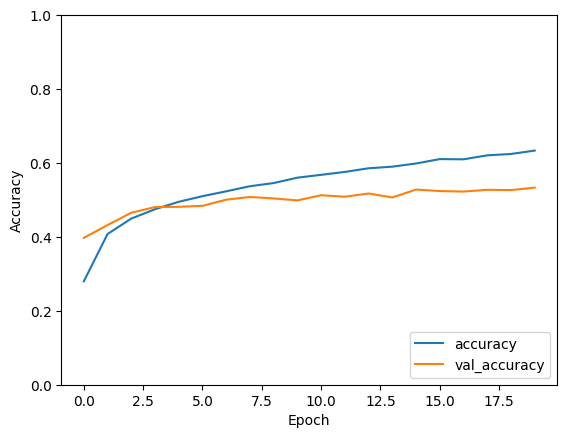

In [70]:
print_graph(MyCNN_history_testing_transfer_learning, MyCNN_transfer_learning)

63/63 - 1s - loss: 1.7464 - accuracy: 0.5280 - 792ms/epoch - 13ms/step


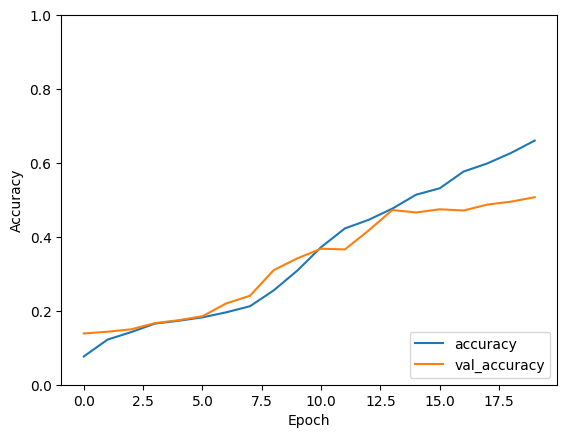

In [72]:
print_graph(MyCNN_history_testing_transfer_learning_2, MyCNN_transfer_learning_2)

Μαζί:

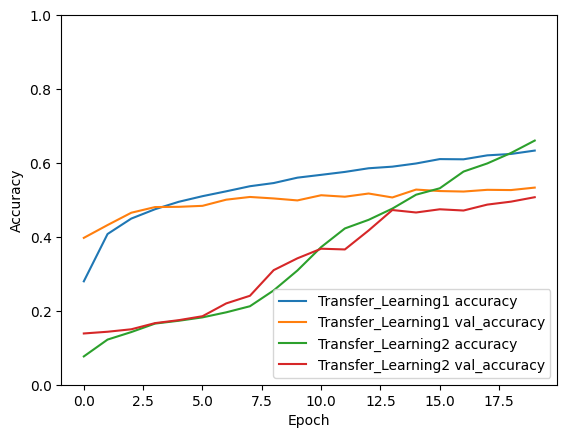

In [73]:
print_graph_together(MyCNN_history_testing_transfer_learning, MyCNN_history_testing_transfer_learning_2, "Transfer_Learning1", "Transfer_Learning2")

Απο το παραπάνω διάγραμμα φαίνεται πως με τη πρώτη περίπτωση έχουμε πολύ καλύτερα αποτελέσματα